### Data Exploration and Preprocessing

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:/Users/kanaa/Downloads/Customer-Churn-Records (1).csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Drop unnecessary columns
data_cleaned = data.drop(columns=["RowNumber", "CustomerId", "Surname", "Exited"])

# Create CLV metric
data_cleaned["CLV"] = data_cleaned["Balance"] * data_cleaned["Tenure"] * data_cleaned["NumOfProducts"]

# Encode categorical features
categorical_columns = ["Geography", "Gender", "Card Type"]
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col, encoder in label_encoders.items():
    data_cleaned[col] = encoder.fit_transform(data_cleaned[col])

# Scale numerical features
scaler = StandardScaler()
numerical_columns = [
    "CreditScore", "Age", "Tenure", "Balance", "NumOfProducts",
    "EstimatedSalary", "Point Earned", "CLV"
]
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])


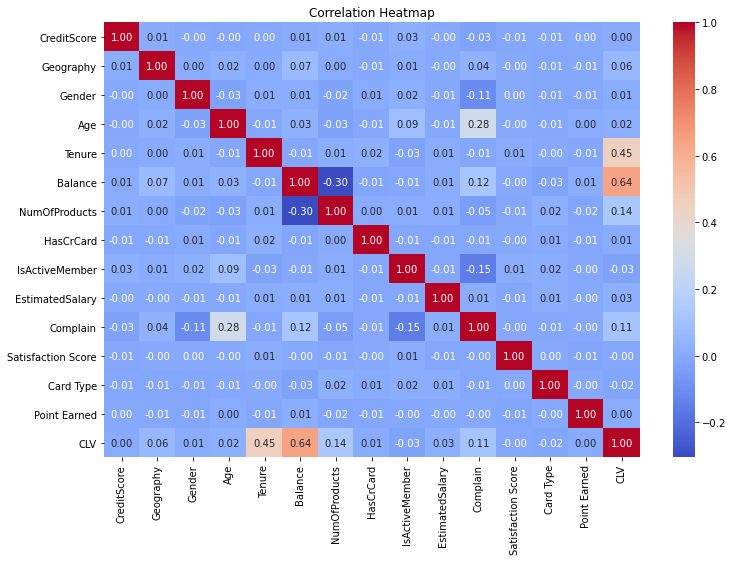

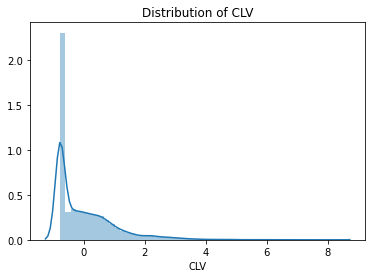

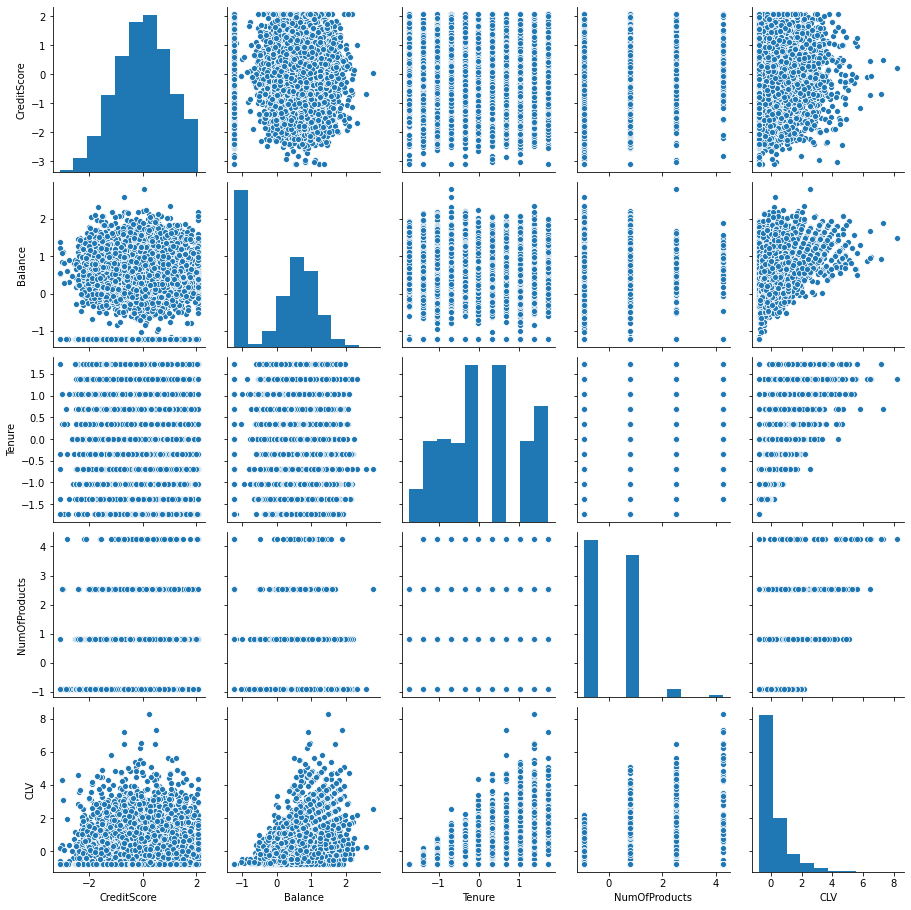

In [3]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.distplot(data_cleaned["CLV"], kde=True, hist=True)
plt.title("Distribution of CLV")
plt.show()

# Pairplot for selected features
selected_features = ["CreditScore", "Balance", "Tenure", "NumOfProducts", "CLV"]
sns.pairplot(data_cleaned[selected_features])
plt.show()


In [4]:
# Splitting the data
X = data_cleaned.drop(columns=["CLV", "Satisfaction Score"])
y = data_cleaned["CLV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


Linear Regression - MAE: 0.35, MSE: 0.26, R-squared: 0.73
Ridge Regression - MAE: 0.35, MSE: 0.26, R-squared: 0.73
Lasso Regression - MAE: 0.36, MSE: 0.29, R-squared: 0.70


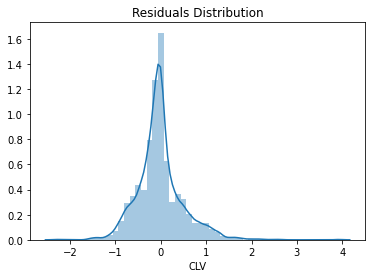

In [6]:
# Define a function for model evaluation
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MAE: {mae:.2f}, MSE: {mse:.2f}, R-squared: {r2:.2f}")

# Evaluate all models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

# Residuals plot using distplot
residuals = y_test - y_pred_lr
plt.figure(figsize=(6, 4))
sns.distplot(residuals, kde=True, hist=True)  # Replace histplot with distplot
plt.title("Residuals Distribution")
plt.show()


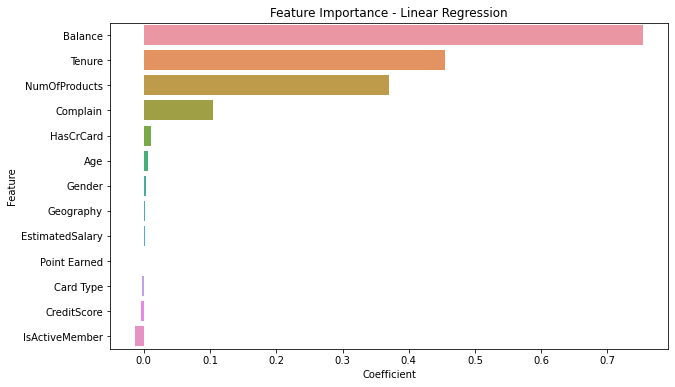

In [7]:
# Feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=feature_importance)
plt.title("Feature Importance - Linear Regression")
plt.show()
